# Project: Iris dataset 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline

In [2]:
custom_rcparams = {'figure.figsize': (6,4)}
sns.set_theme(
    style = 'whitegrid',
    font_scale=  1.2,
    
    rc = custom_rcparams
    


)

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

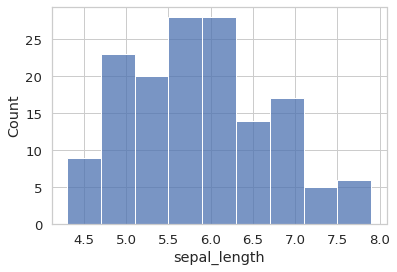

In [5]:
sns.histplot(
    data = df,
    x= "sepal_length"


)

## Data Preprocessing

In [6]:
df.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
df.select_dtypes('object').columns

Index(['species'], dtype='object')

In [9]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='count', ylabel='species'>

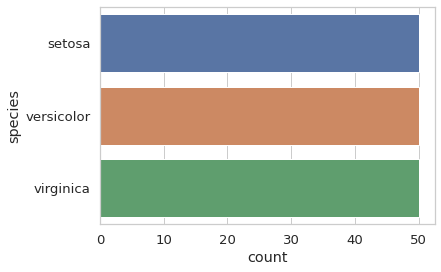

In [10]:
sns.countplot(
    data = df,
    y = 'species'
)

In [11]:
df =df.astype({
    'species': 'category',
})

In [12]:
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Analyze by Visualizing Data

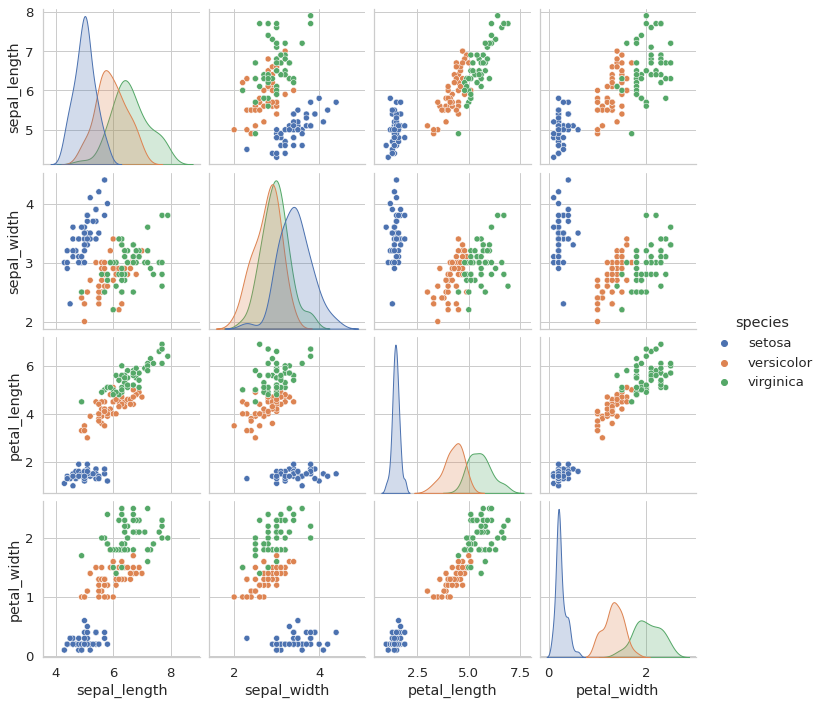

In [14]:
sns.pairplot( 
    data  = df,
    hue = 'species'
)

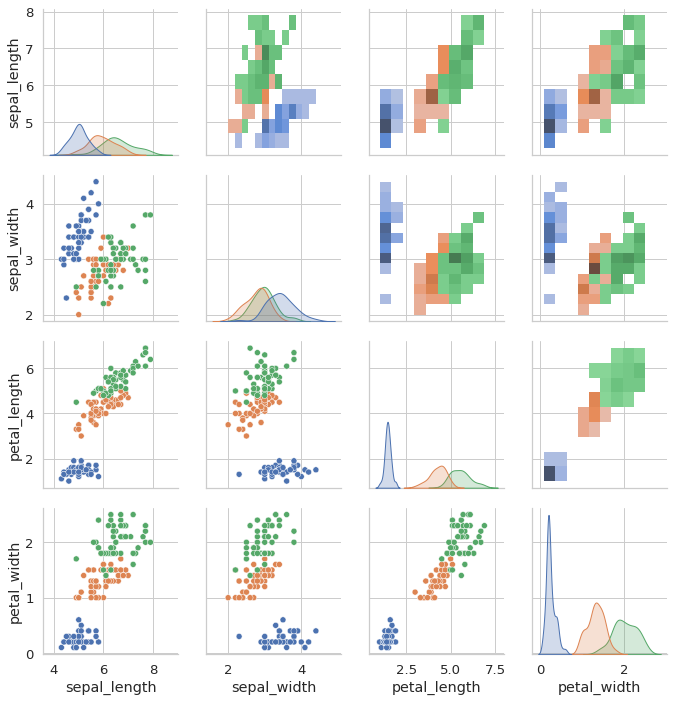

In [15]:
g =sns.PairGrid(df, hue = 'species')
g.map_upper(sns.histplot)
g.map_diag(sns.kdeplot, fill = True)
g.map_lower(sns.scatterplot)

<AxesSubplot:>

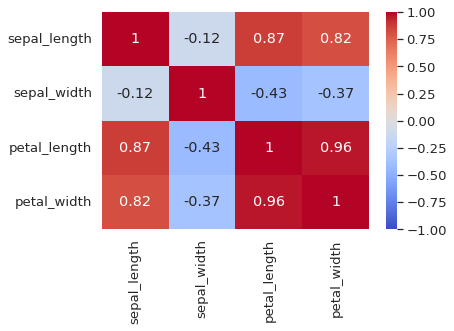

In [16]:
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm', vmax = 1, vmin =-1)

In [21]:
from pandas_profiling import ProfileReport

In [22]:
profile = ProfileReport(df, title="Pandas Profiling Report")


In [23]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.166778,0.881898,0.834289,0.617390
sepal_width,-0.166778,1.000000,-0.309635,-0.289032,0.445572
petal_length,0.881898,-0.309635,1.000000,0.937667,0.890446
petal_width,0.834289,-0.289032,0.937667,1.000000,0.924266
species,0.617390,0.445572,0.890446,0.924266,1.000000


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


,sepal_length,sepal_width,petal_length,petal_width,species,# duplicates
2,5.8,2.7,5.1,1.9,virginica,2
0,5.8,2.7,5.1,1.9,setosa,0
1,5.8,2.7,5.1,1.9,versicolor,0


In [24]:
profile.to_file("iris_report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[]
